# Binary oversampling

This notebook presents the general usecase of the ```smote_variants``` package, namely, the oversampling of binary classification datasets.

In [1]:
import numpy as np
import smote_variants as sv
import matplotlib.pyplot as plt

import logging
logging.getLogger('smote_variants').setLevel(logging.CRITICAL)

2022-08-16 15:01:11.535976: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 15:01:11.541237: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 15:01:11.541253: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from smote_variants.visualization import (plot_raw, 
                                          plot_oversampled, 
                                          plot_sampling,
                                          plot_sampling_raw, 
                                          plot_comparison, 
                                          plot_comparison_raw)

from smote_variants.datasets import load_illustration_2_class

In [3]:
# loading the dataset
dataset= load_illustration_2_class()
X, y= dataset['data'], dataset['target']

## Illustrating the imbalanced nature

To illustrate the nature of imbalanced datasets, we are generating one.

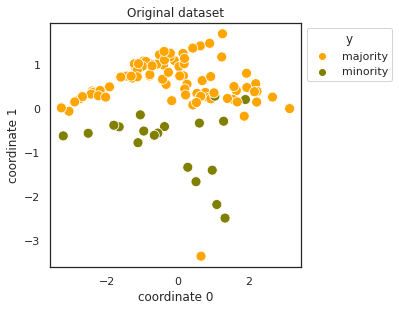

In [4]:
_ = plot_raw(X, y, "Original dataset")

In [5]:
# printing the number of samples

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 81
minority class: 19


## Oversampling

The oversampling is carried out by instantiating any oversampler implemented in the package and calling the ```sample``` function.

In [6]:
oversampler= sv.distance_SMOTE()
X_samp, y_samp= oversampler.sample(X, y)

## Illustrating the oversampled dataset

The oversampled dataset is illustrated by printing the number of samples after oversampling. The newly generated samples can be filtered by removing the first ```len(X)``` elements of the oversampled dataset. Note that this filtering works only with *extensive* techniques, namely, with oversamplers which only add samples to the dataset. There are multiple oversamplers which also remove noisy samples, with these oversamplers there is no way to filter newly generated samples.

In [7]:
# printing the number of samples
print('majority class: %d' % np.sum(y_samp == 0))
print('minority class: %d' % np.sum(y_samp == 1))

majority class: 81
minority class: 81


In [8]:
# printing the number of new samples
print('majority new samples: %d' % np.sum(y_samp[len(y):] == 0))
print('minority new samples: %d' % np.sum(y_samp[len(y):] == 1))

majority new samples: 0
minority new samples: 62


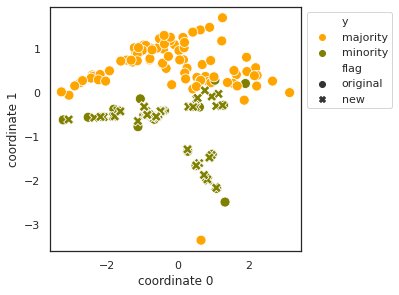

In [9]:
_ = plot_oversampled(X, y, X_samp, y_samp)

## Illustrating all oversampling techniques

In this section, we illustrate the output of all oversampling techniques with default parameters on the ```iris0``` dataset.

In [10]:
oversamplers= sv.get_all_oversamplers()

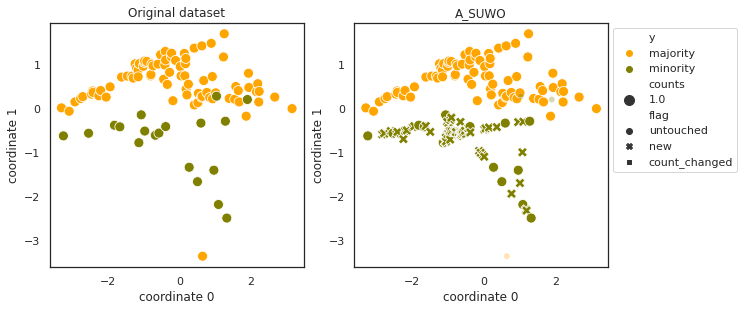

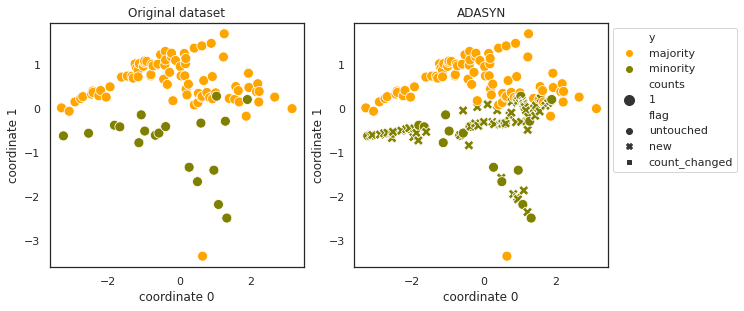

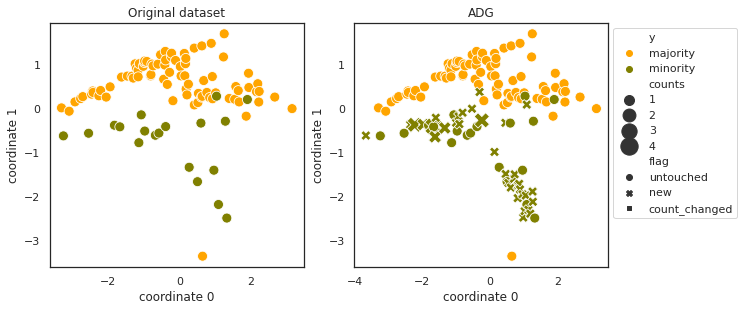

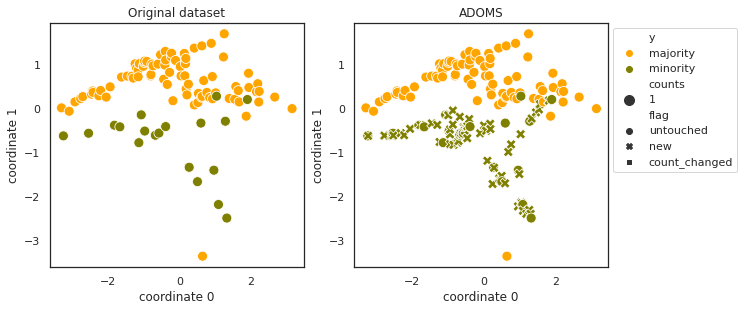

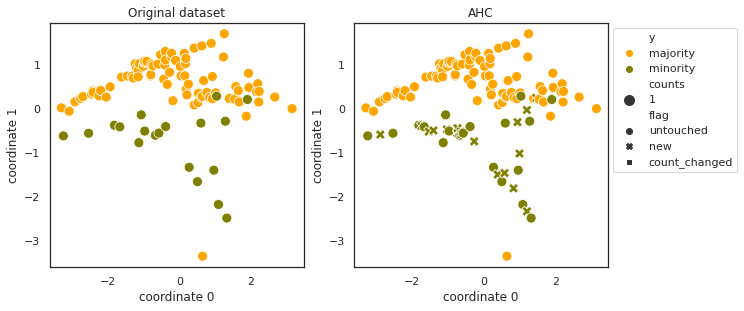

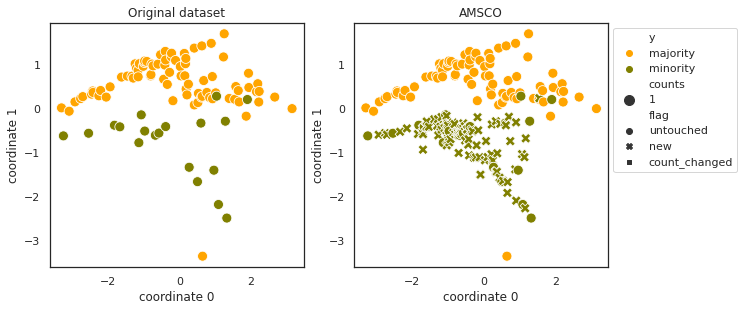

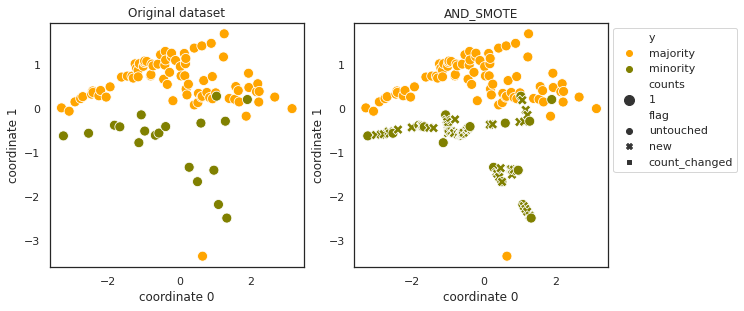

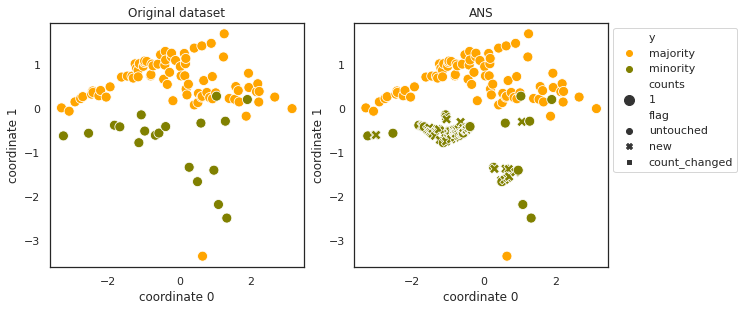

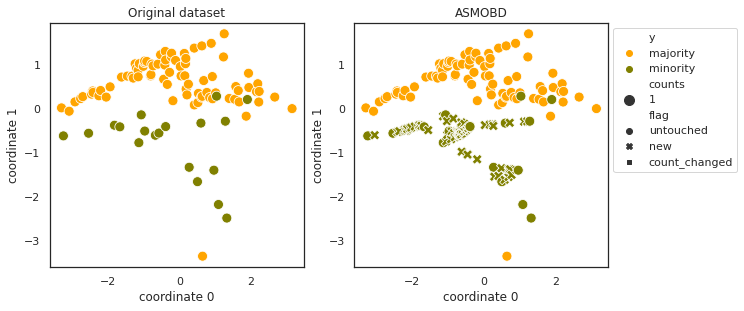

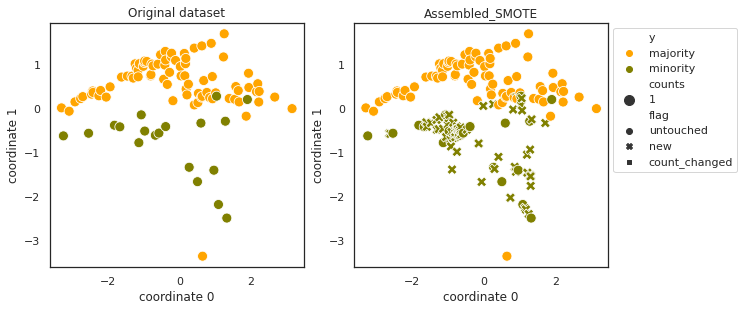

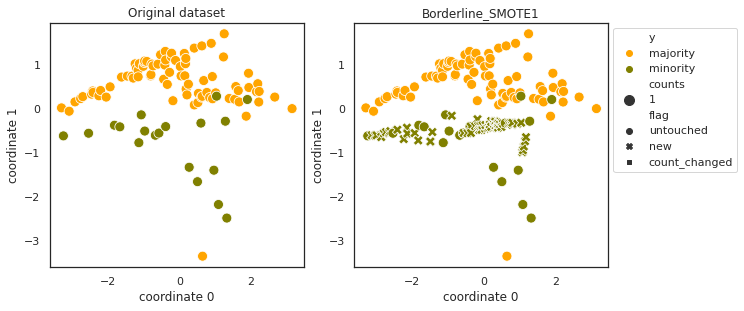

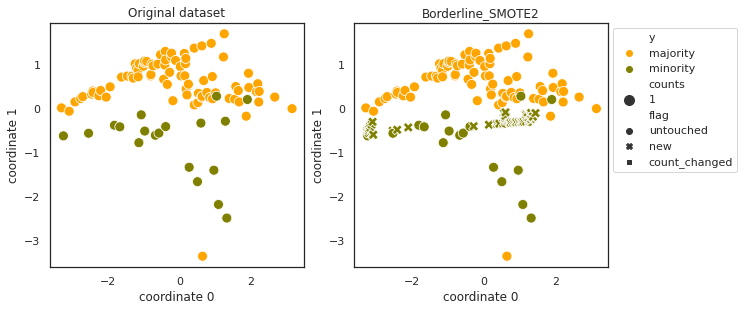

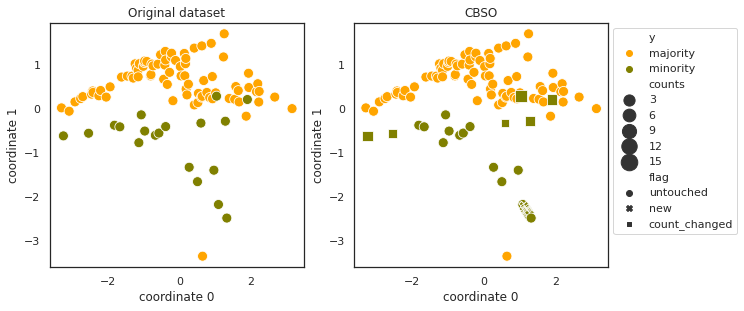

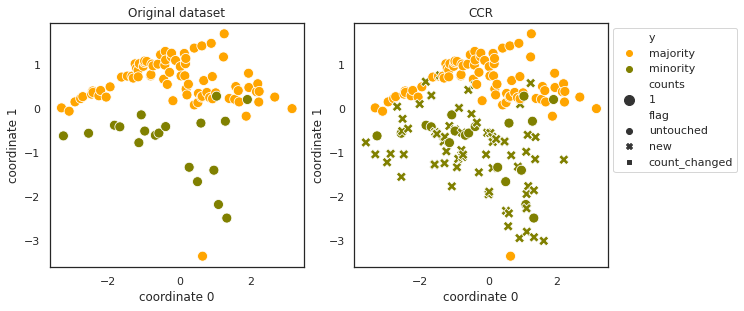

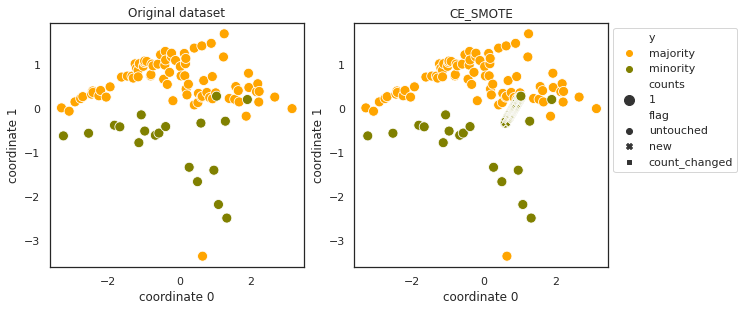

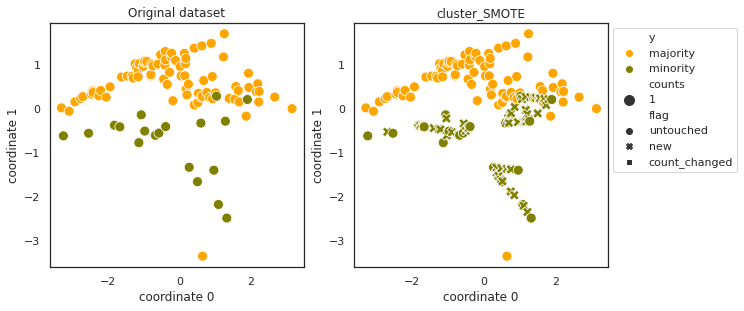

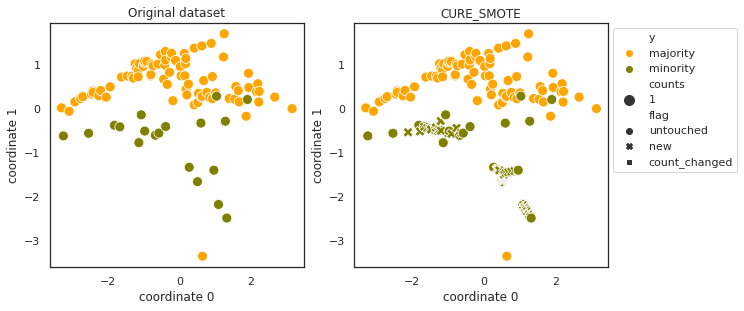

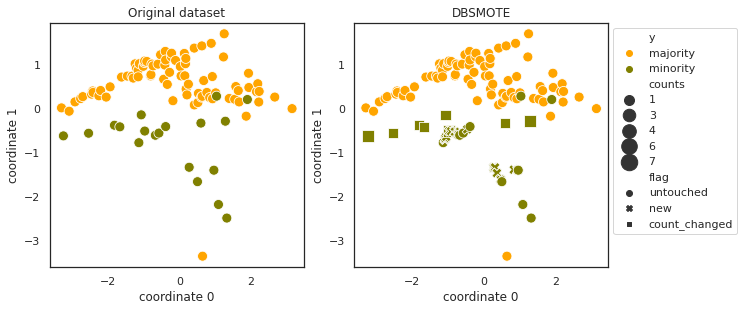

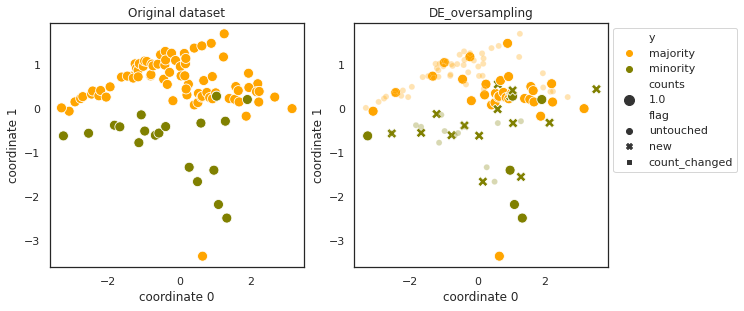

2022-08-16 15:01:42.214901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-16 15:01:42.215532: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-16 15:01:42.215893: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (daa): /proc/driver/nvidia/version does not exist
2022-08-16 15:01:42.220525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 3ms/step


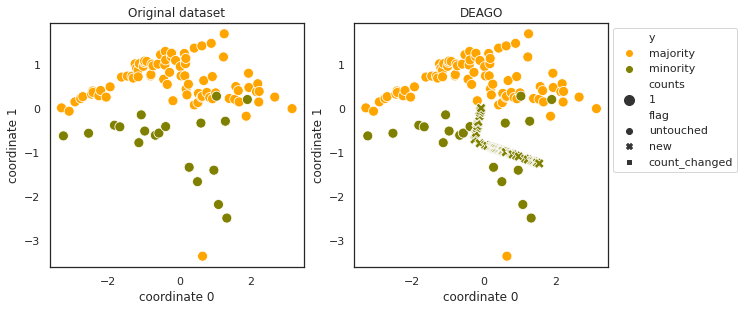

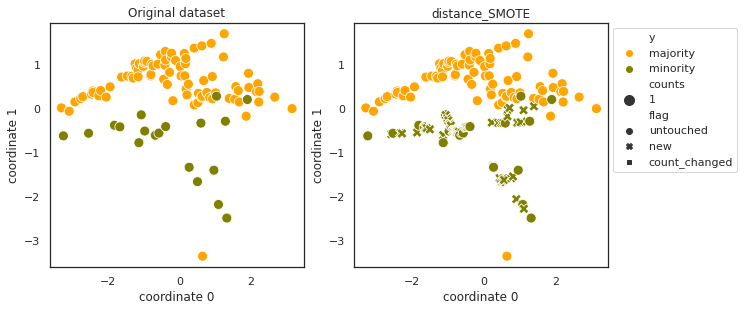

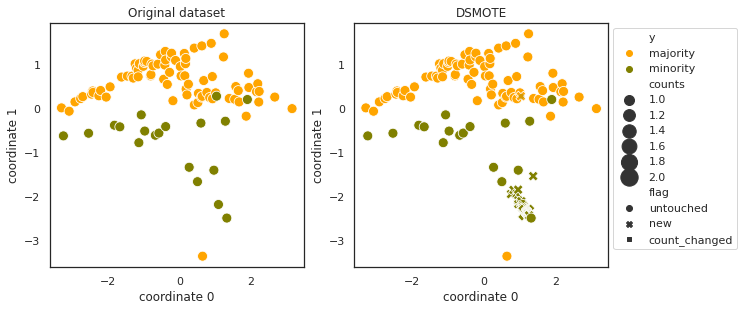

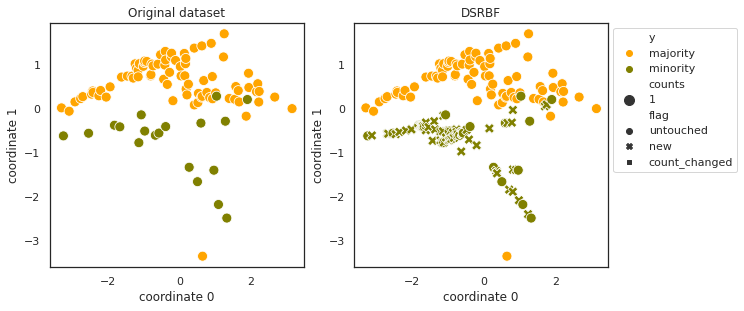

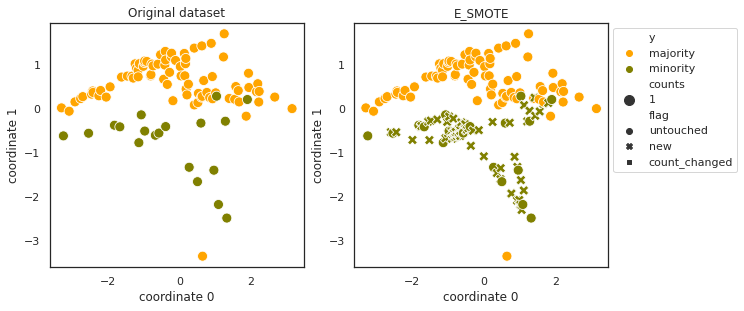

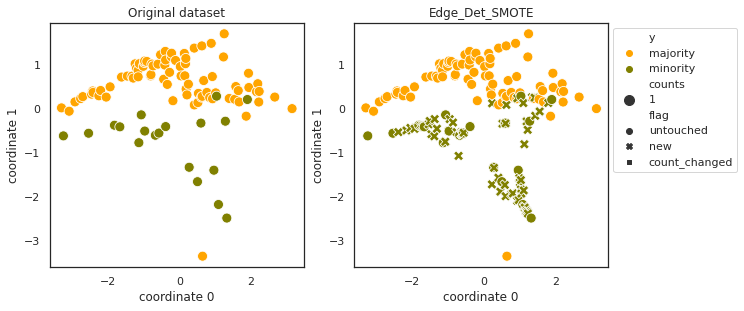

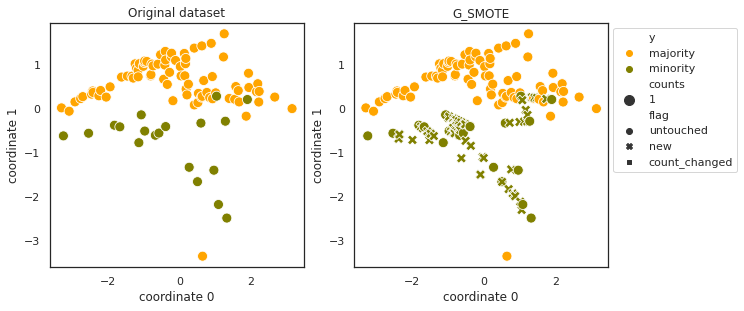

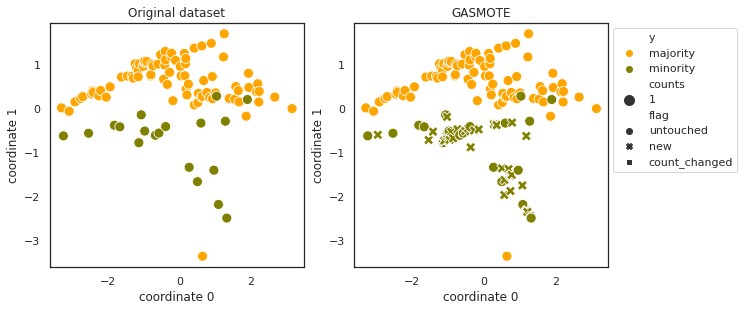

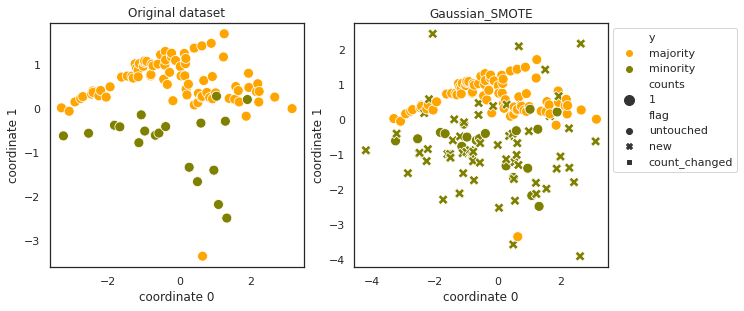

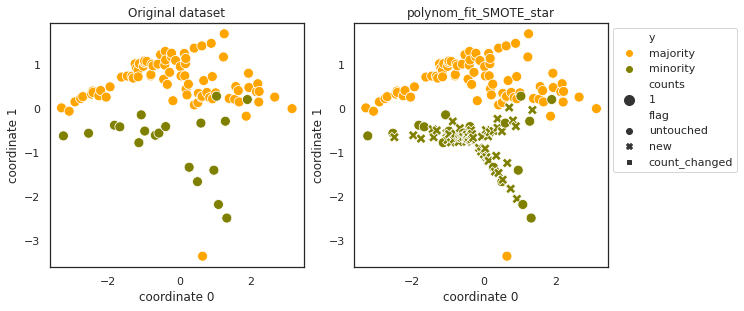

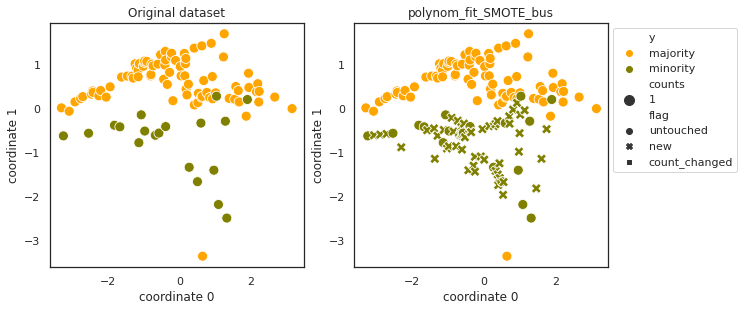

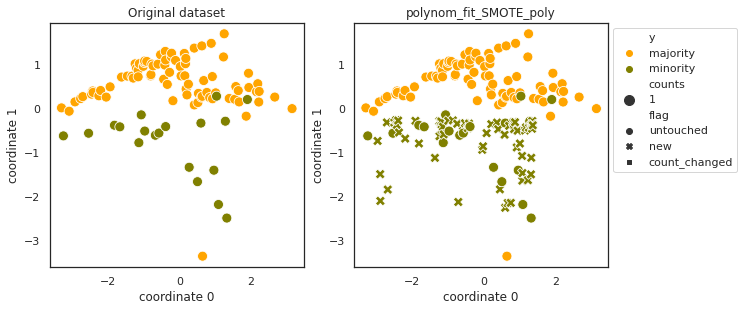

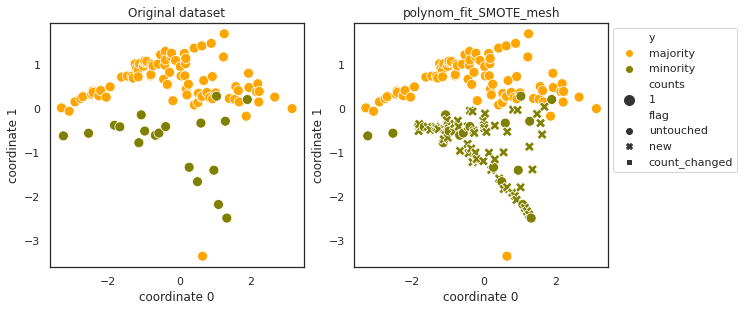

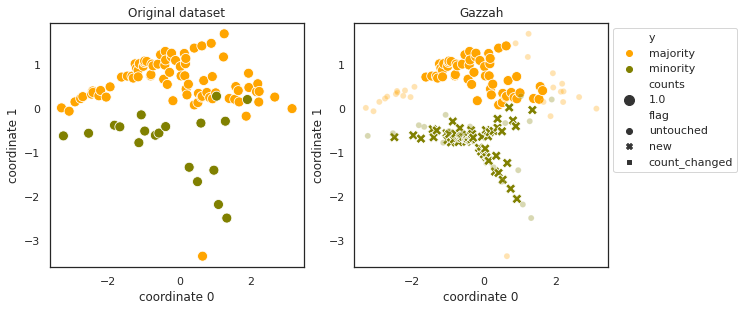

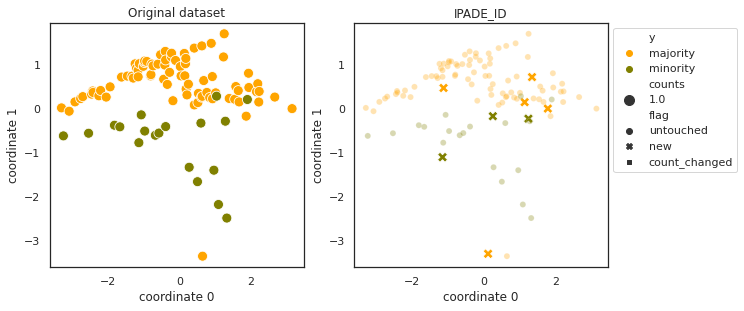

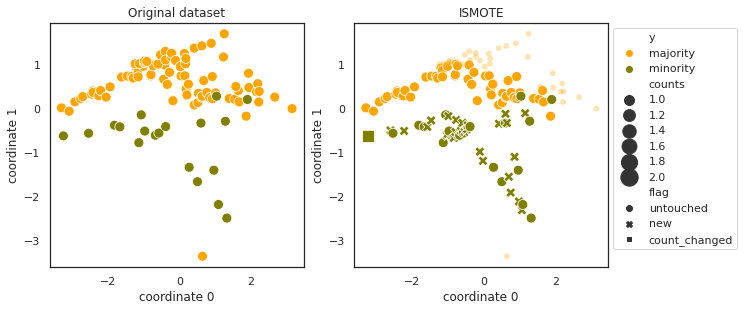

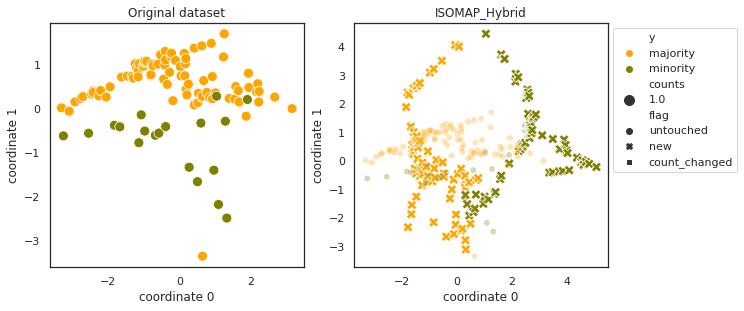

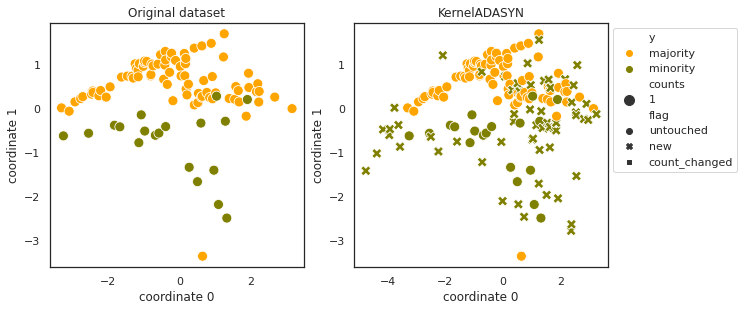

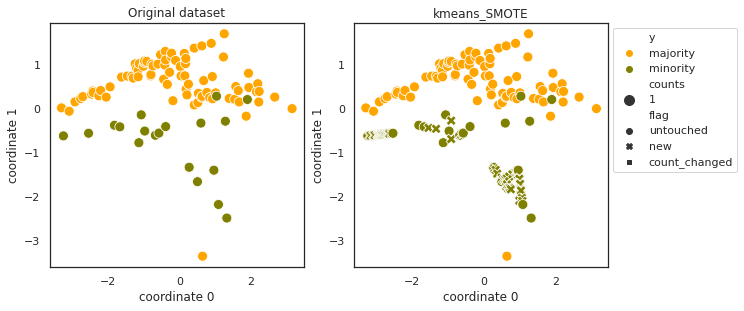

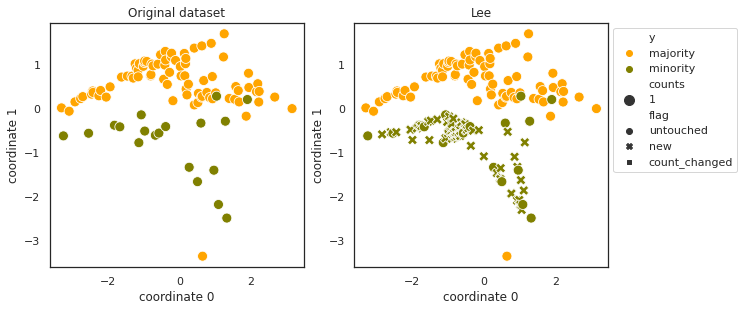

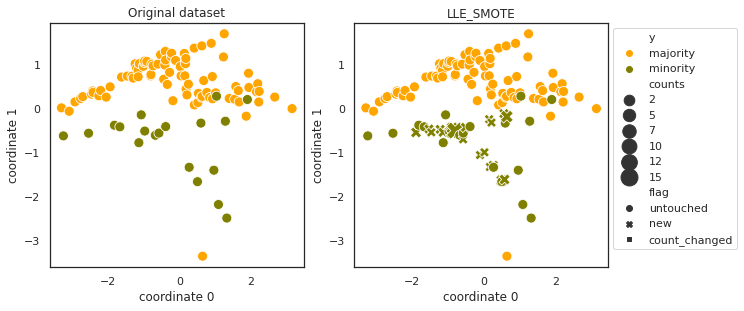

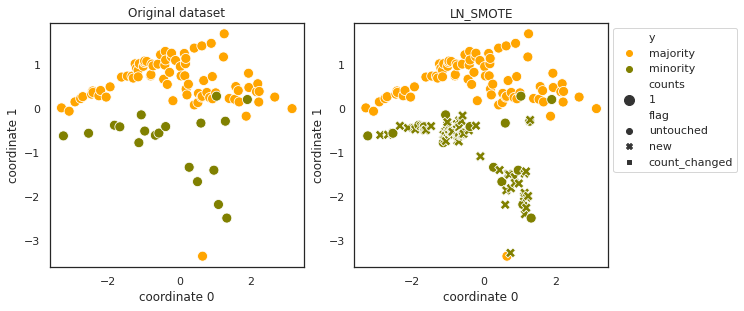

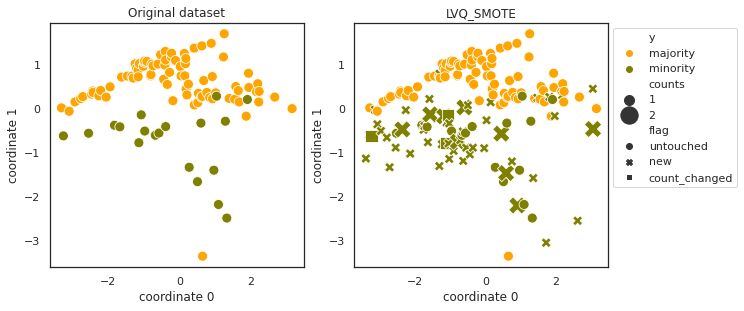

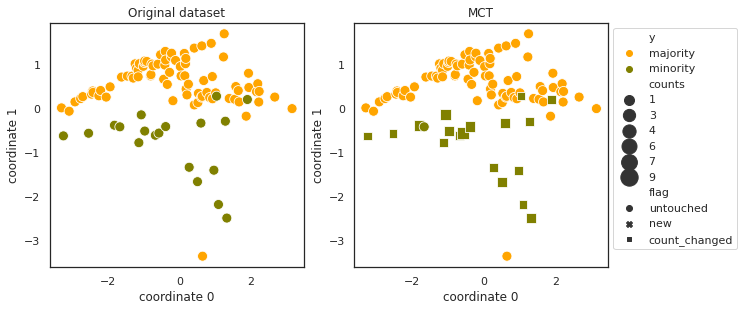

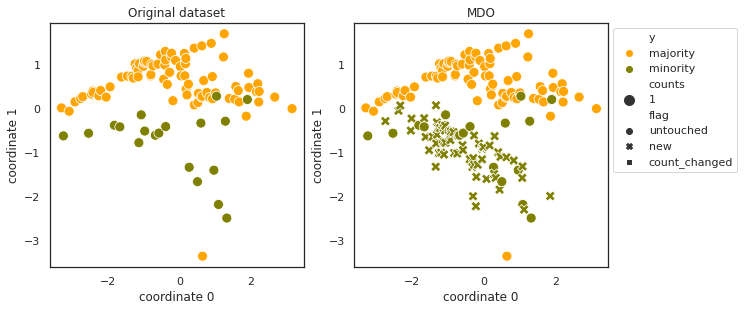

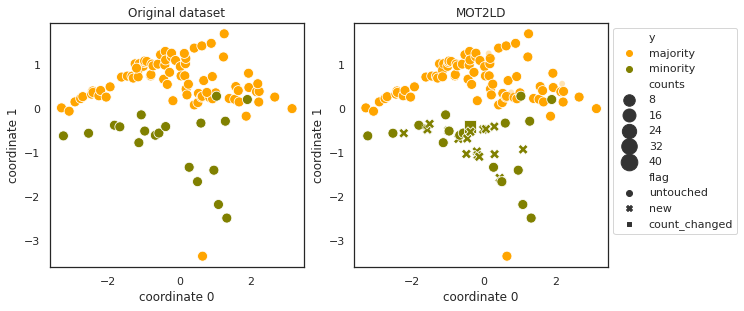

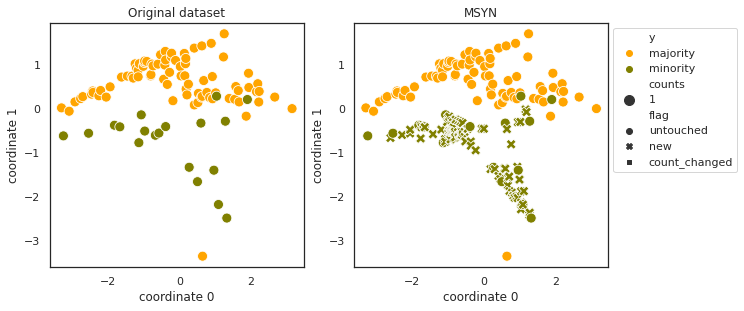

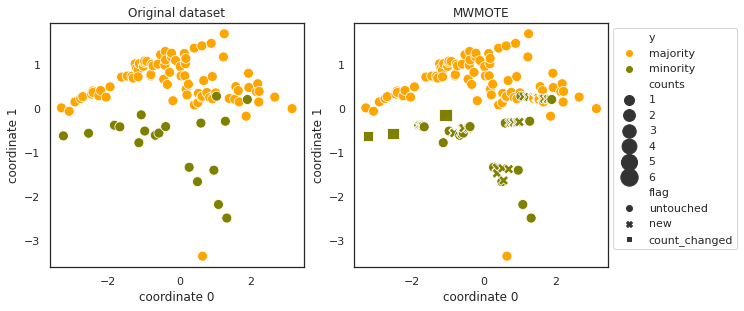

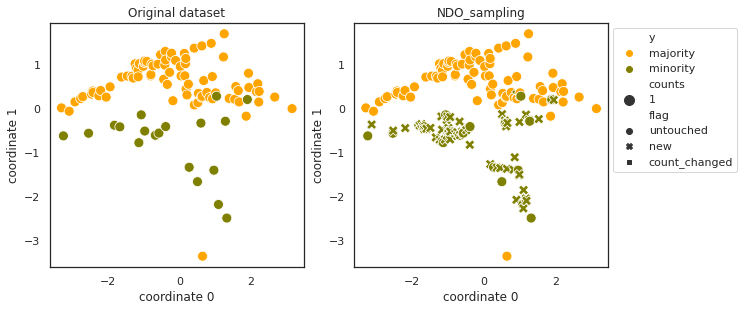

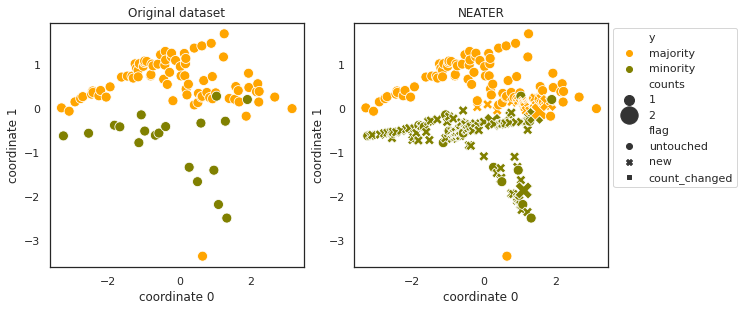

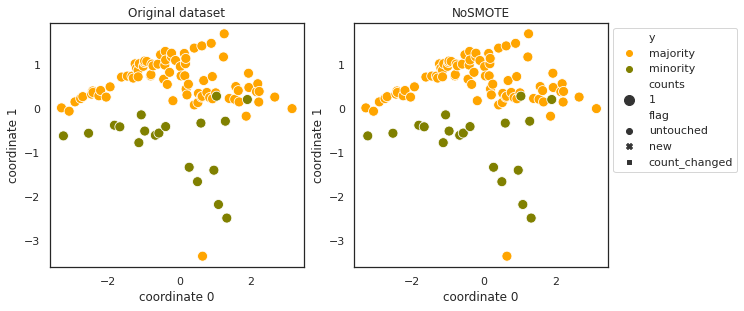

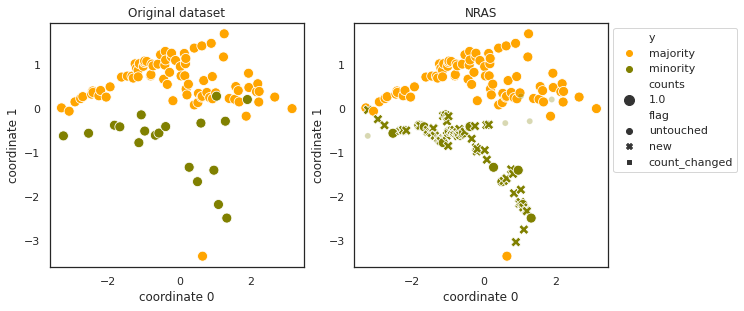

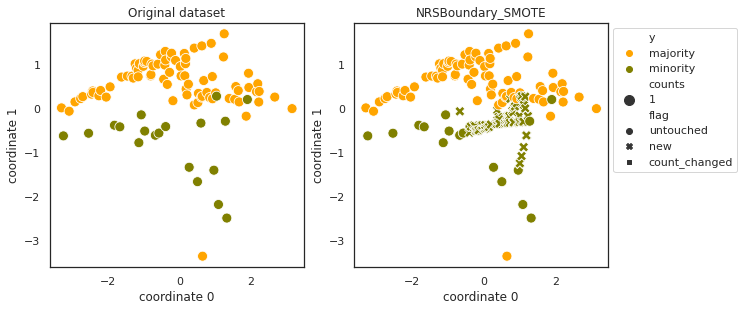

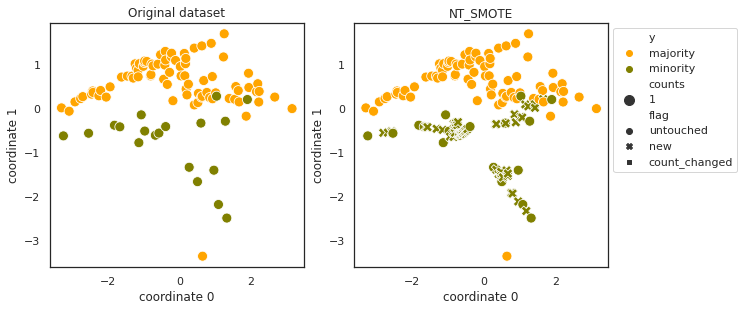

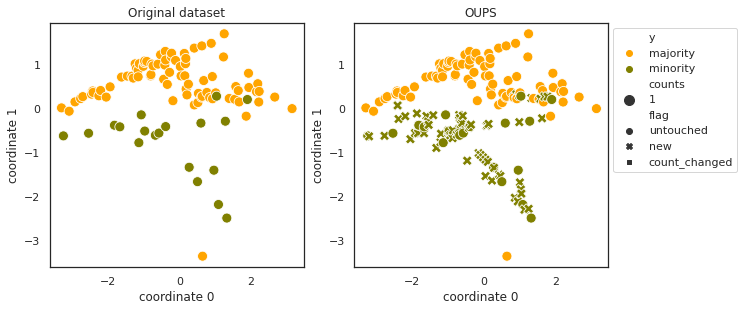

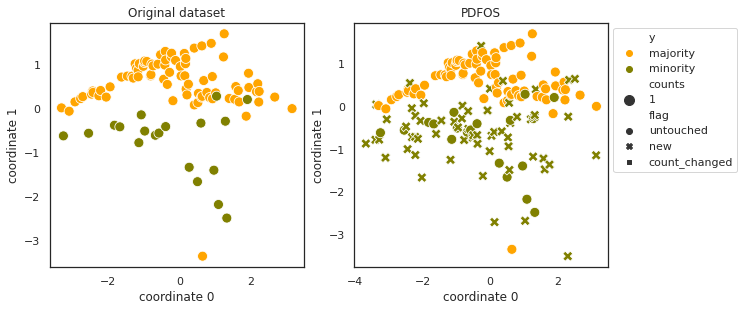

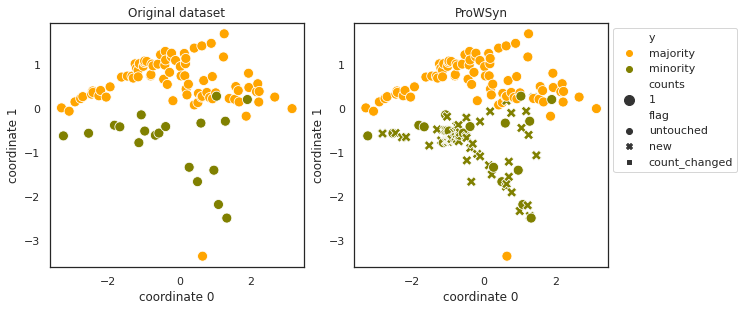

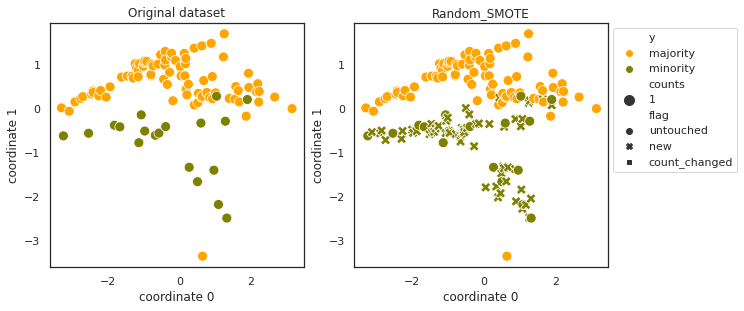

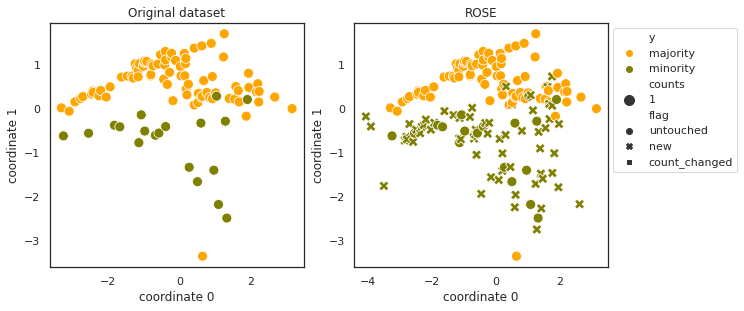

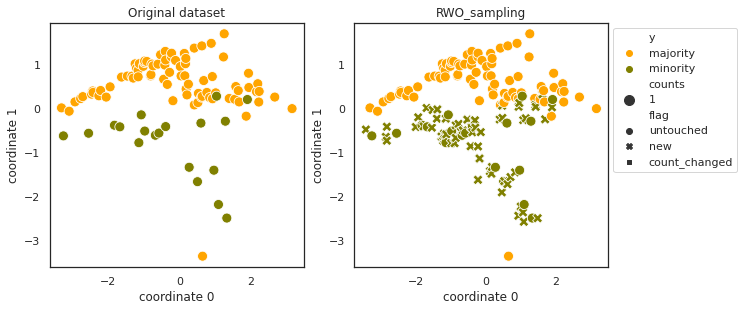

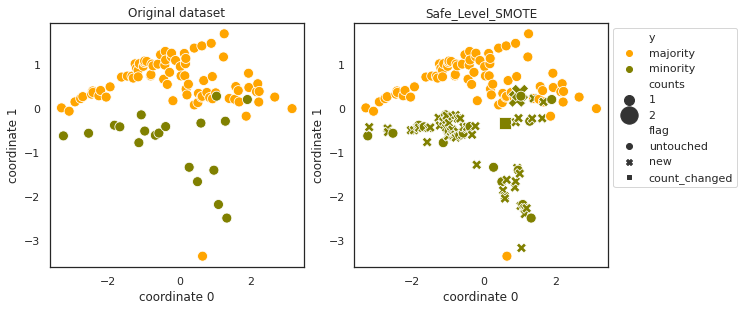

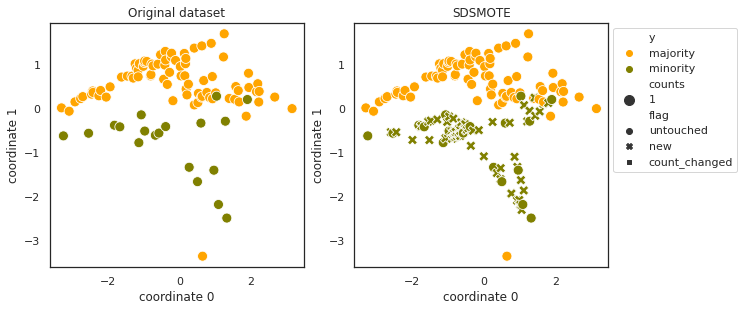

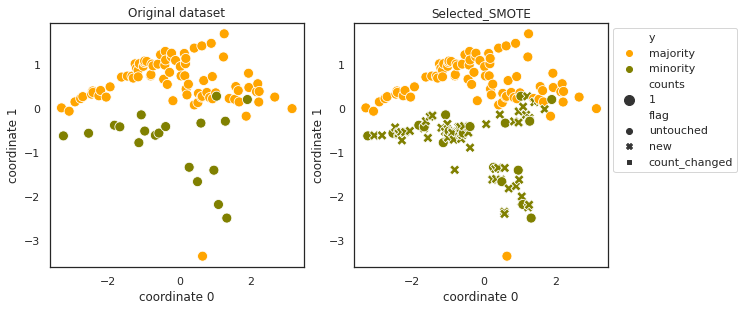

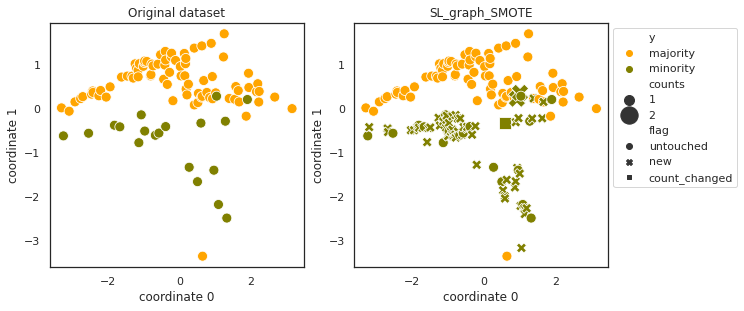

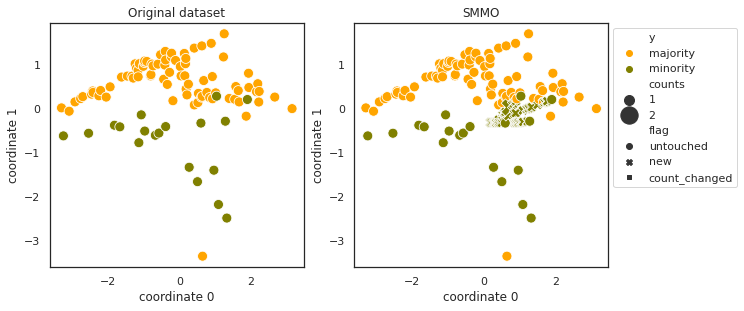

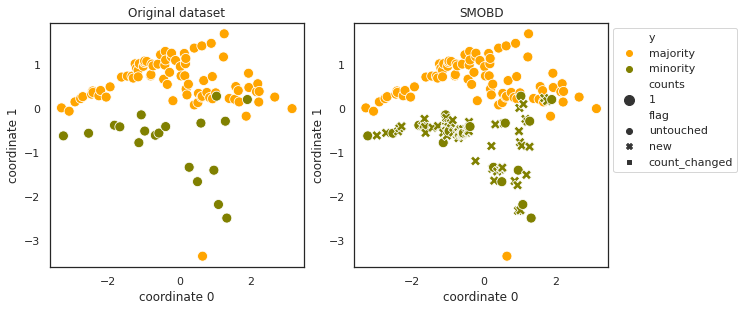

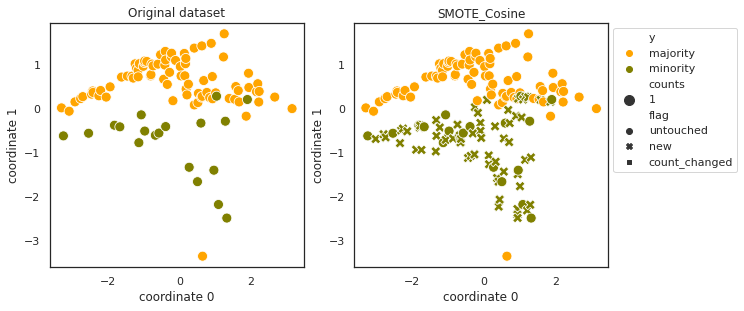

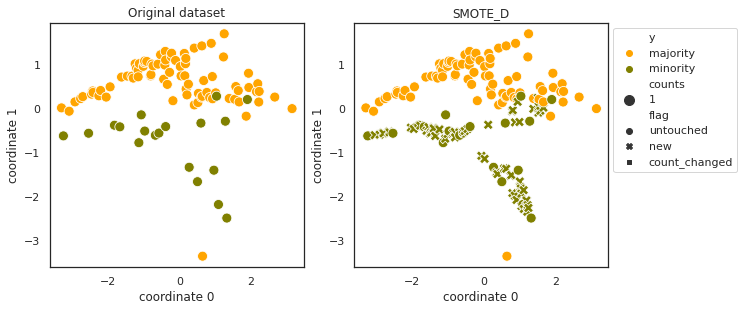

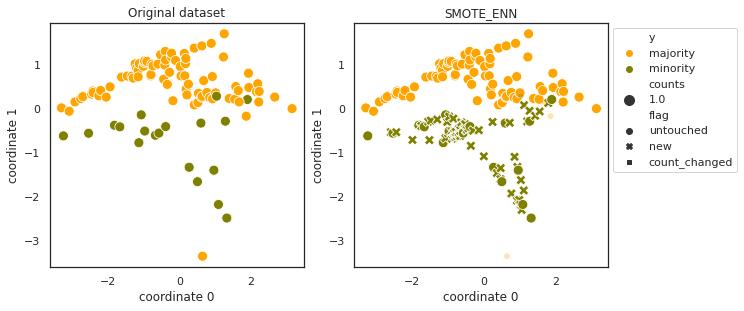

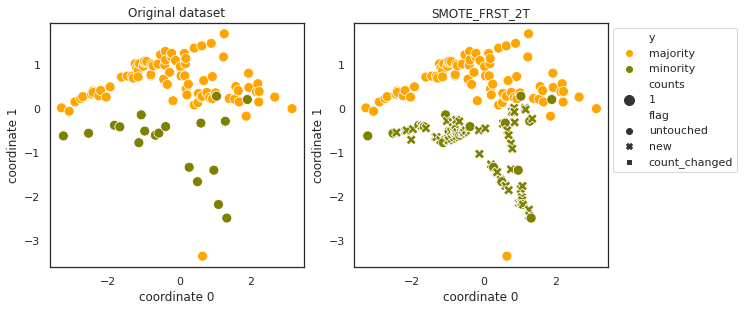

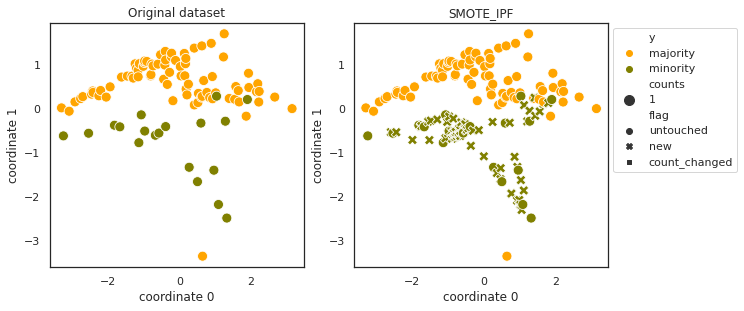

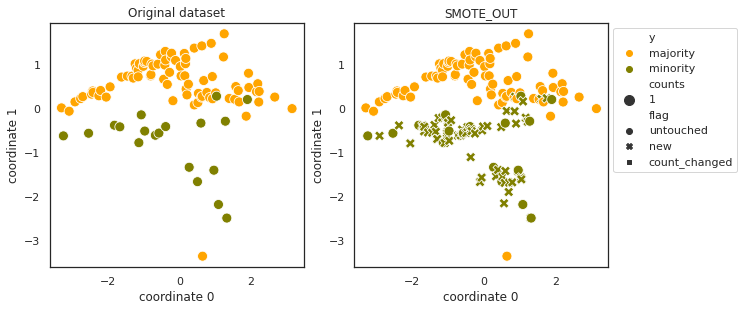

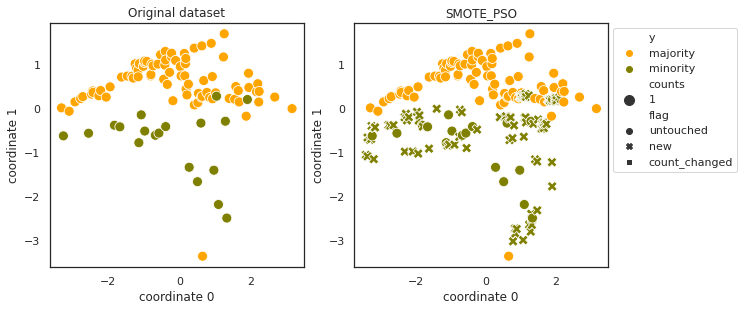

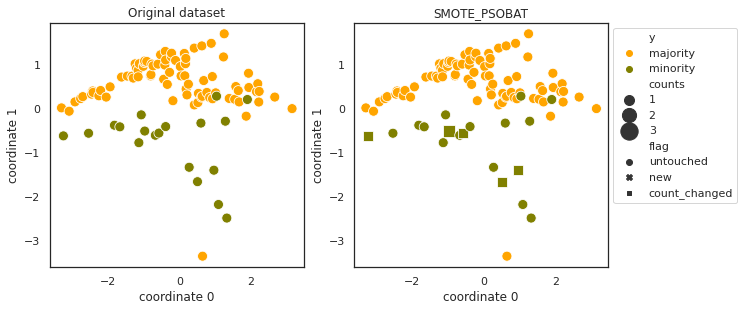

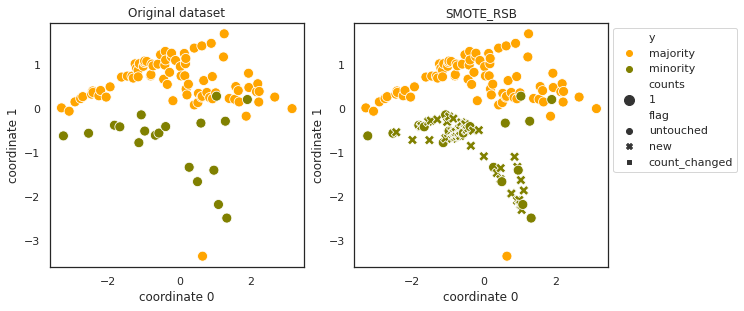

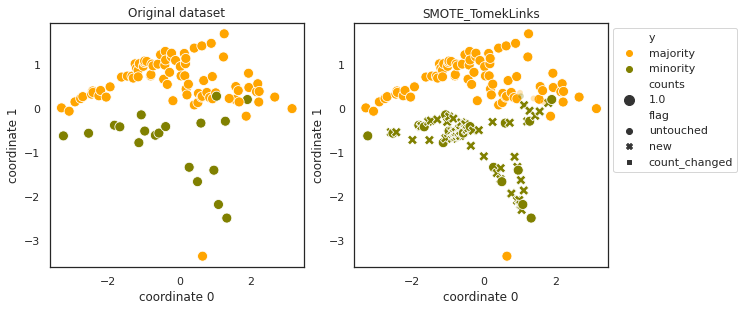

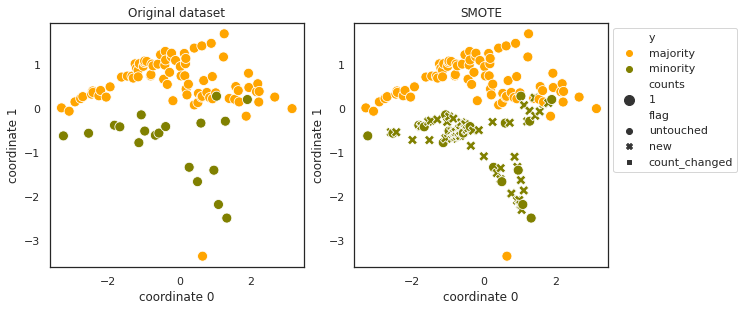

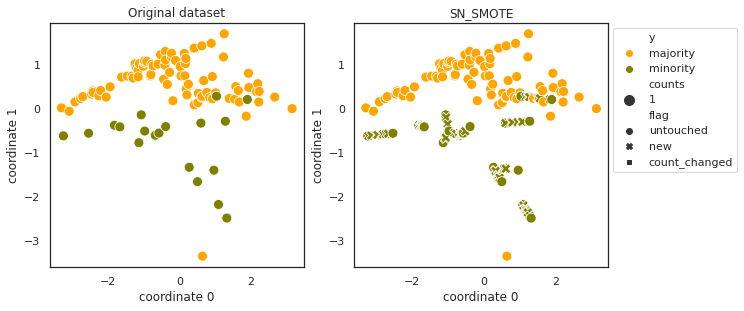

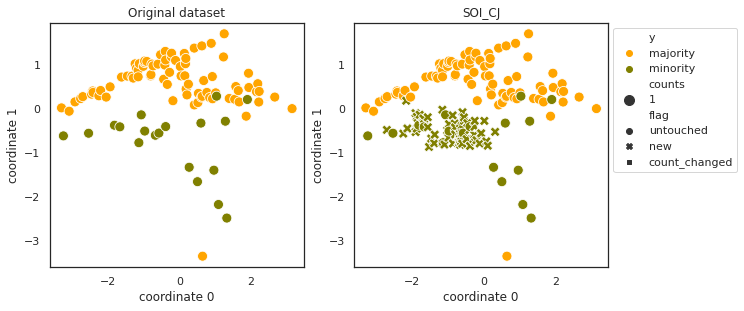

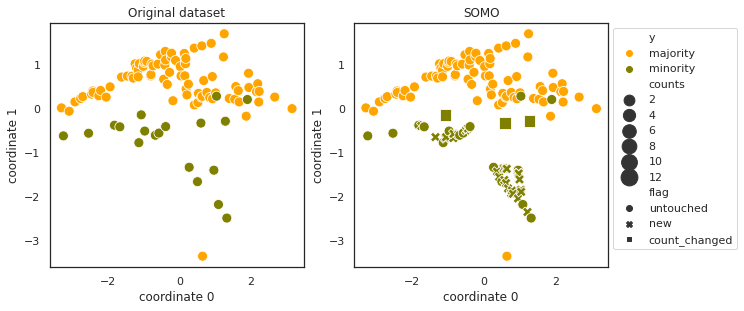

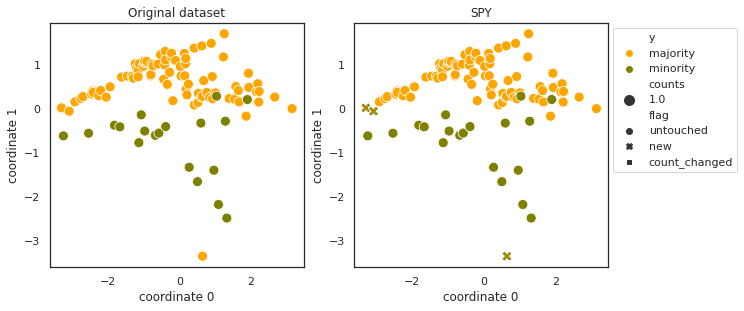

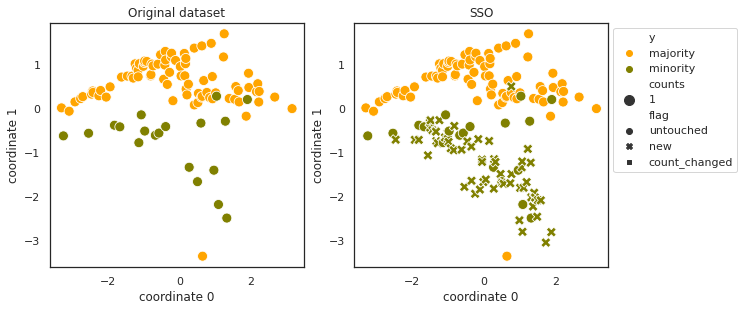

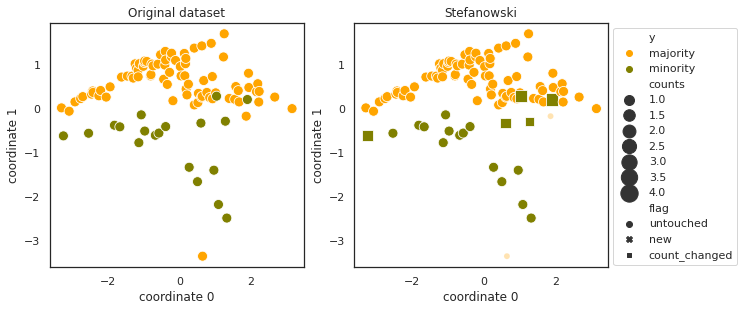

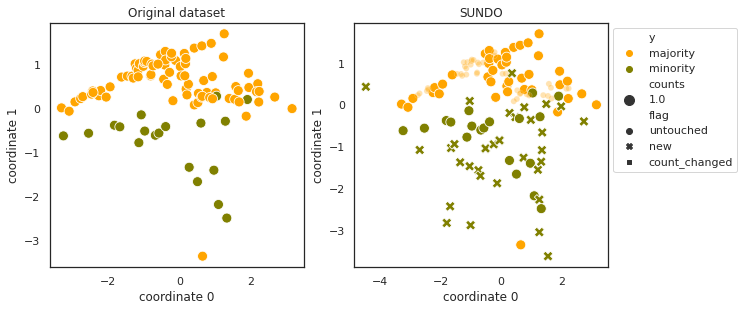

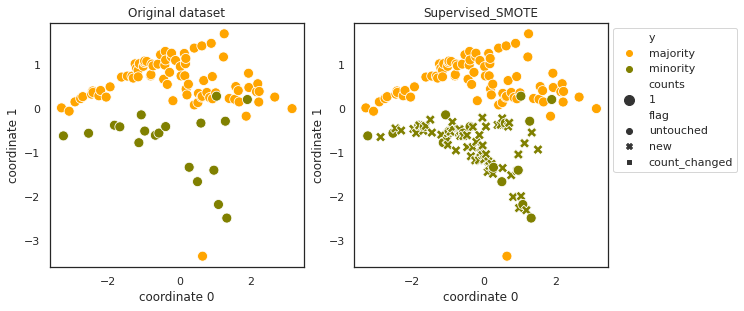

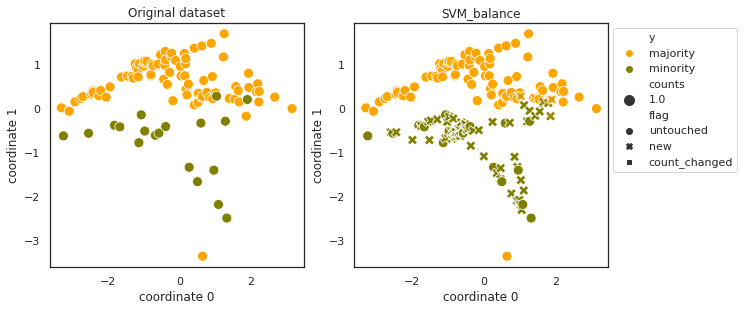

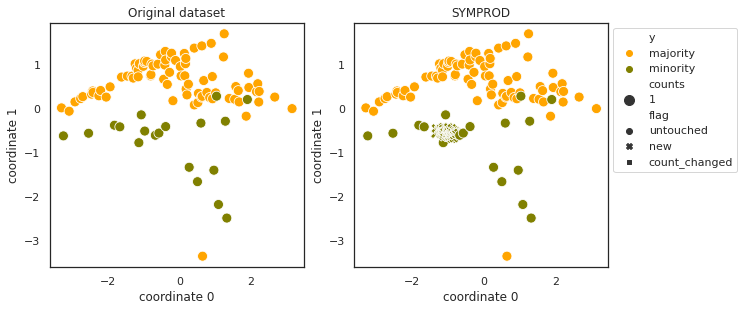

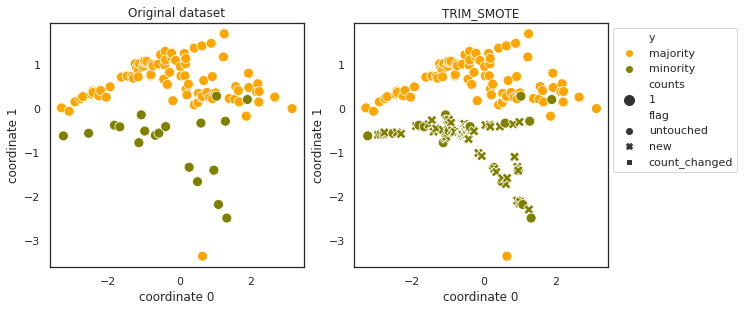

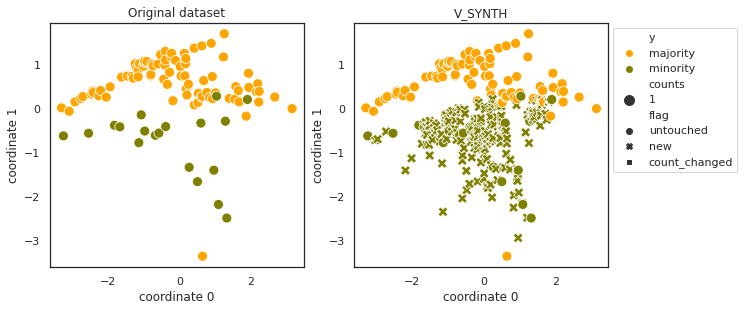

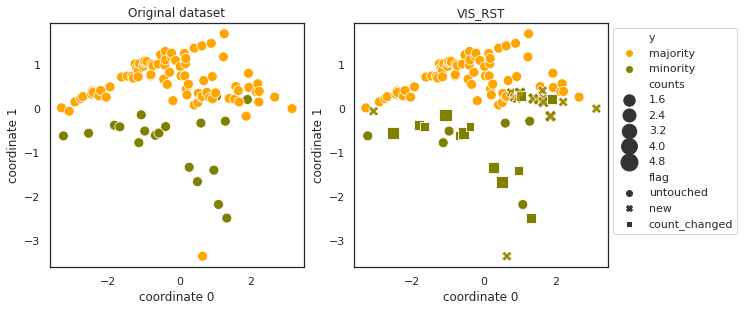

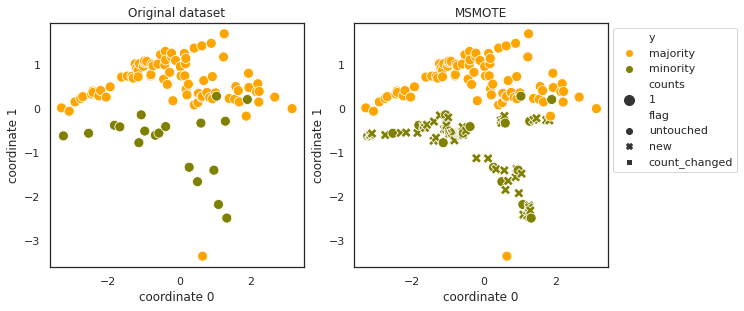

In [11]:
for o in oversamplers:
    oversampler= o(random_state=13)
    X_samp, y_samp= oversampler.sample(X, y)
    
    _ = plot_sampling_raw(X=X, y=y, X_samp=X_samp, y_samp=y_samp, title=o.__name__)
    plt.show()

## Comparison of two oversampling techniques

In [12]:
X_samp, y_samp = sv.SMOTE().sample(X, y)
X_samp1, y_samp1 = sv.distance_SMOTE().sample(X, y)

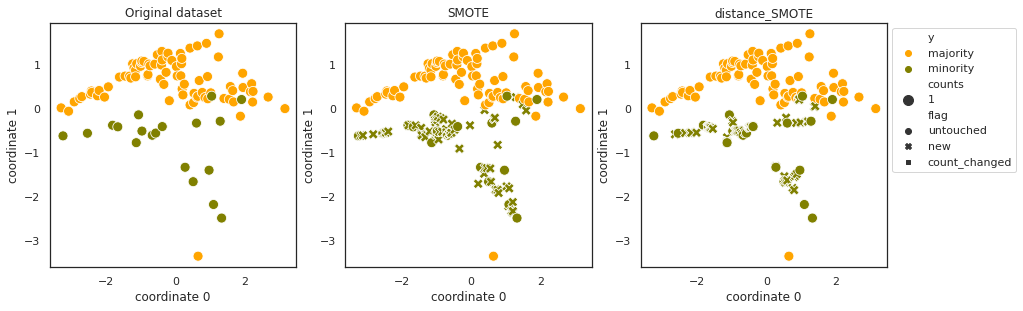

In [13]:
_ = plot_comparison_raw(X=X, 
                        y=y, 
                        X_samp0=X_samp, 
                        y_samp0=y_samp, 
                        X_samp1=X_samp1, 
                        y_samp1=y_samp1, 
                        title0="SMOTE", 
                        title1="distance_SMOTE")
plt.show()